<a href="https://colab.research.google.com/github/AriqF1/dataMining/blob/main/eksperimenTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_path = 'gym_tracking.csv'
data = pd.read_csv(file_path)
print(data.head())


   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

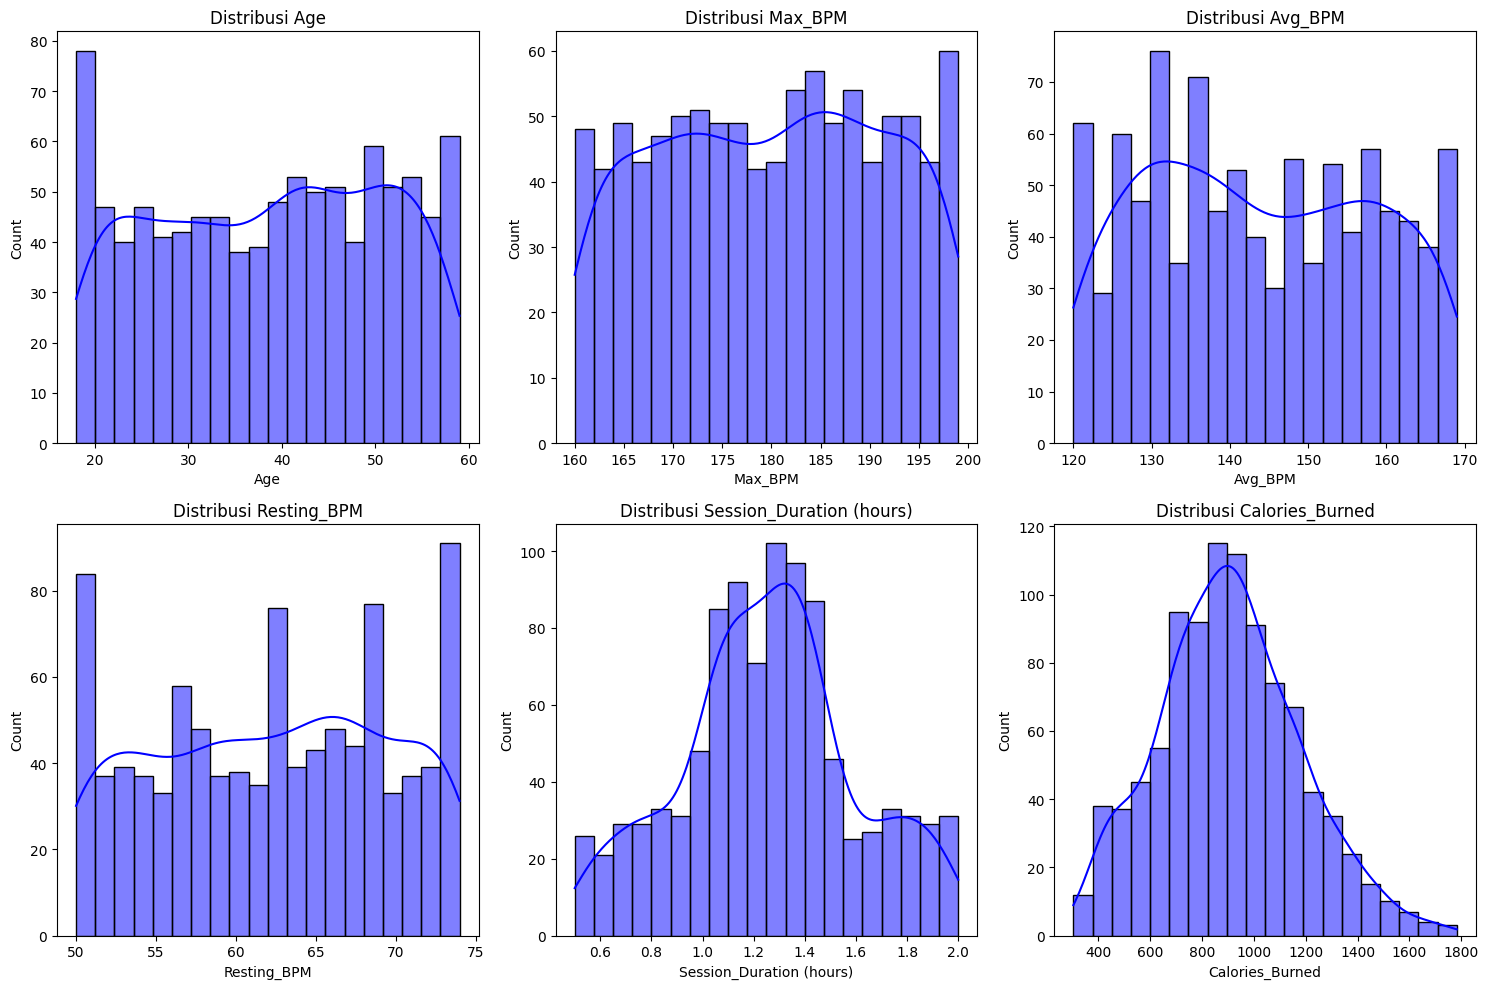

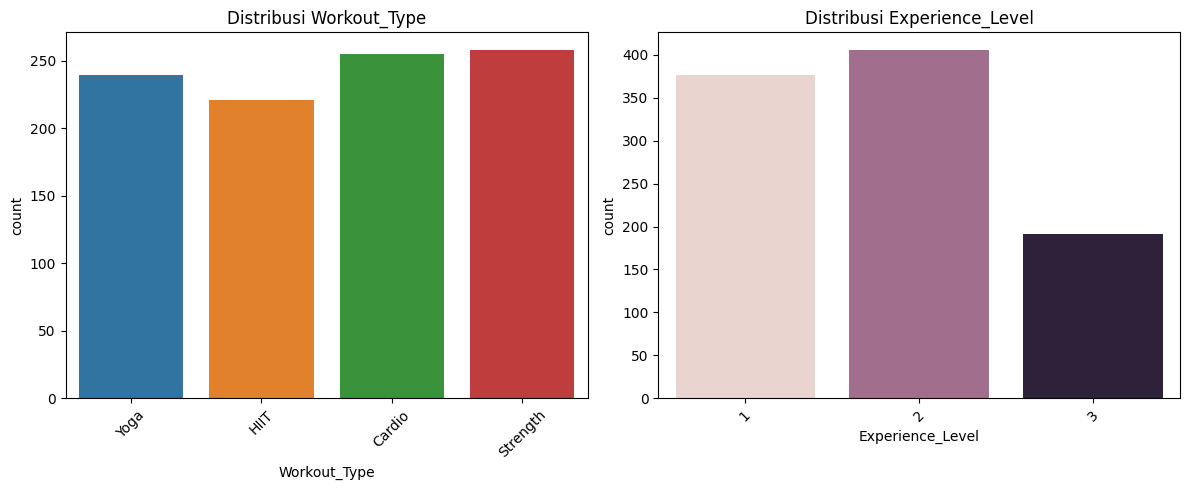

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# visualisasi distribusi
numeric_features = ['Age', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
                    'Session_Duration (hours)', 'Calories_Burned']
categorical_features = ['Workout_Type', 'Experience_Level']

# fitur numerik
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, bins=20, color='blue')
    plt.title(f'Distribusi {feature}')
plt.tight_layout()
plt.show()

# fitur kategorical
plt.figure(figsize=(12, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=data, x=feature, hue=feature, dodge=False, legend=False)
    plt.title(f'Distribusi {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



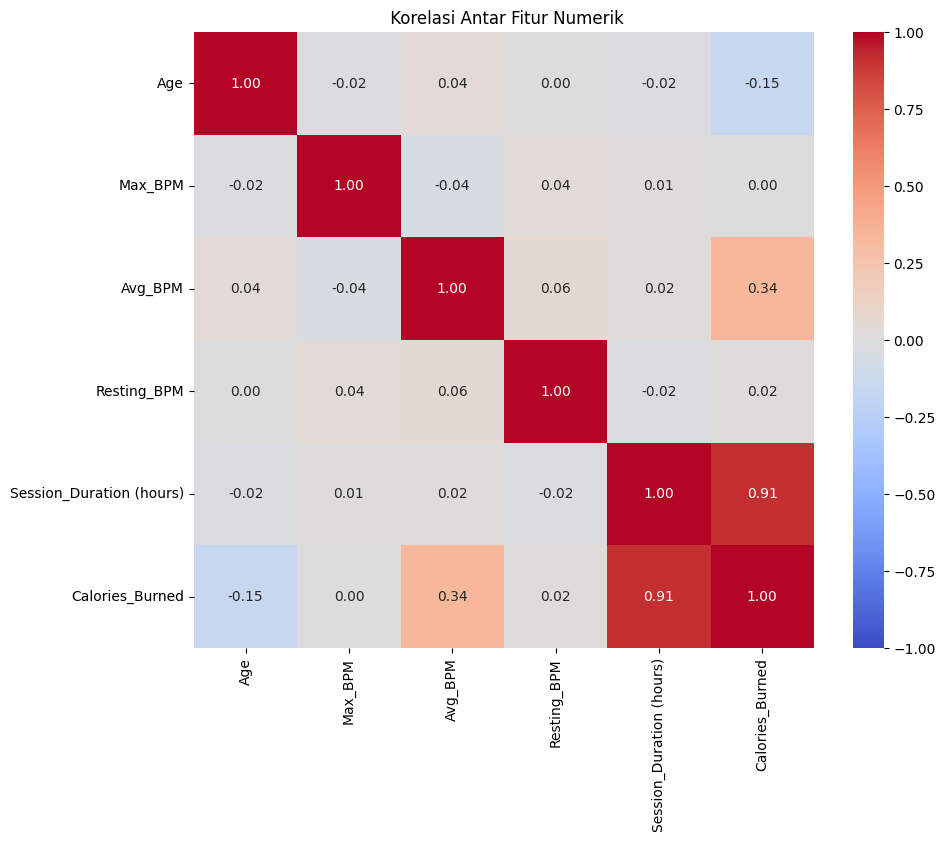

In [ ]:
# Analisis korelasi antar fitur numerik
correlation_matrix = data[numeric_features].corr()
# heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title(' Korelasi Antar Fitur Numerik')
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding
one_hot_features = ['Gender', 'Workout_Type']

# Inisialisasi OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Terapkan
one_hot_encoded = one_hot_encoder.fit_transform(data[one_hot_features])
one_hot_columns = one_hot_encoder.get_feature_names_out(one_hot_features)
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns, index=data.index)

# Menampilkan hasil encoding
print(one_hot_encoded_df.head())


   Gender_Male  Workout_Type_HIIT  Workout_Type_Strength  Workout_Type_Yoga
0          1.0                0.0                    0.0                1.0
1          0.0                1.0                    0.0                0.0
2          0.0                0.0                    0.0                0.0
3          1.0                0.0                    1.0                0.0
4          1.0                0.0                    1.0                0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Kolom untuk Label Encoding
label_encode_feature = 'Experience_Level'

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Menerapkan Label Encoding
data[label_encode_feature] = label_encoder.fit_transform(data[label_encode_feature])

# Gabungkan dengan dataset utama
data_encoded = pd.concat([data.drop(columns=one_hot_features), one_hot_encoded_df], axis=1)

# dataset yang telah di-encode
print(data_encoded.head())



   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56         88.3        1.71      180      157           60   
1   46         74.9        1.53      179      151           66   
2   32         68.1        1.66      167      122           54   
3   25         53.2        1.70      190      164           56   
4   38         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.69           1313.0            12.6   
1                      1.30            883.0            33.9   
2                      1.11            677.0            33.4   
3                      0.59            532.0            28.8   
4                      0.64            556.0            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 2   
1                    2.1                              4         